In [82]:
%matplotlib inline
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
import numpy as np
from config import api_key

In [2]:
titles = []
release_dates = []
overview = []

In [3]:
for x in range(6):
    url = "https://api.themoviedb.org/3/discover/movie?&sort_by=revenue.desc&api_key="+api_key+"&page="+str(x+1)+"&with_keywords=2597|227007"
    response = requests.get(url)
    data = response.json() 
    for y in range(len(data["results"])):
        titles.append(data["results"][y]["title"])
        release_dates.append(data["results"][y]["release_date"])
        overview.append(data["results"][y]["overview"])

In [5]:
url_tv = "https://api.themoviedb.org/3/discover/tv?&api_key="+api_key+"&page="+str(x+1)+"&with_keywords=9738|9951"
response_tv = requests.get(url_tv)
data_tv = response_tv.json() 
for x in range(len(data_tv["results"])):
    titles.append(data_tv["results"][x]["name"])
    release_dates.append(data_tv["results"][x]["first_air_date"])
    overview.append(data_tv["results"][x]["overview"])

In [66]:
#print(len(titles))

In [67]:
years = []
months = []
for x in range(len(release_dates)):
    try:
        y = release_dates[x]
        year = y.split("-")[0]
        month = y.split("-")[1]
        years.append(year)
        months.append(month)
    except:
        years.append("")
        months.append("")

In [71]:
movie_data = {
    "Titles":titles,
    "Year":years,
    "Month": months,
    "Overview":overview
}

movie_df = pd.DataFrame(data=movie_data)
movie_df.head()

,Month,Overview,Titles,Year
0,06,"Returning from a hunting trip in the forest, t...",Harry and the Hendersons,1987
1,08,A documentary-style drama based on true accoun...,The Legend of Boggy Creek,1972
2,02,With the ratings dropping for a wilderness-the...,Strange Wilderness,2008
3,01,A documentary that explores the existence of B...,Manbeast! Myth or Monster?,1978
4,06,Mark the Lumberjack is a woodsman with a bad t...,The Lumberjack of All Trades,2006


In [70]:
movie_df.to_csv("bigfoot_movies_tv.csv")

In [72]:
year_df = movie_df.groupby(movie_df["Year"],as_index=False)
year_df = year_df["Titles"].count()
year_df = year_df[year_df.Year != ""]
year_df["Year"] = year_df["Year"].astype(int)

In [73]:
bins = [0,1959,1969,1979,1989,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]
bin_labels = ["before 1959","1960s","1970s","1980s","1990s","2000","'01","'02","'03","'04","'05","'06","'07","'08","'09","'10","'11","'12","2013+"]
#print(len(bins))
#print(len(bin_labels))

In [74]:
year_df["Decade"] = pd.cut(year_df["Year"],bins,labels=bin_labels)
movies_by_year = year_df.groupby(year_df["Decade"],as_index=False).sum()
movies_by_year.tail()

,Decade,Year,Titles
14,'09,2009,1
15,'10,2010,2
16,'11,2011,3
17,'12,2012,6
18,2013+,2013,1


In [75]:
decades = list(movies_by_year["Decade"])
counts = list(movies_by_year["Titles"])
#print(len(decades))

In [76]:
labels = decades[1:5] + decades[9:19]
sizes = counts[1:5] + counts[9:19]
#print(len(labels))
#print(len(sizes))

Text(1.5,0.95,'Note:\n2004-2012 correspond with the 10 years of highest Big Foot sightings\n(2000-2001, 2003-2009, and 2012).')

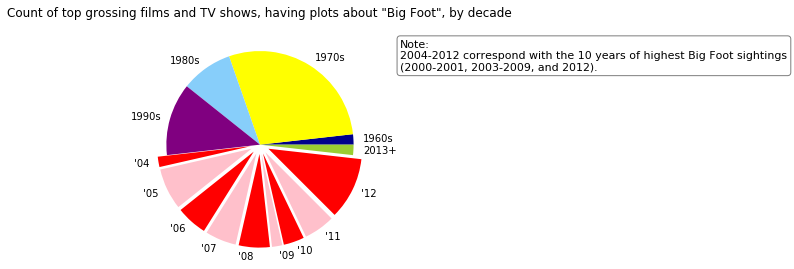

In [98]:
colors = ["darkblue", "yellow", "lightskyblue","purple","red","pink","red","pink","red","pink","red","pink","red","yellowgreen"]
explode = (0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0)
plt.pie(sizes, labels=labels, colors=colors,labeldistance=1.1,explode = explode)
plt.axis('equal')
plt.title("Count of top grossing films and TV shows, having plots about \"Big Foot\", by decade",y=1.08)
textstr = ("Note:\n2004-2012 correspond with the 10 years of highest Big Foot sightings\n(2000-2001, 2003-2009, and 2012).")
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(1.5, 0.95, textstr, fontsize=11,verticalalignment='center', bbox=props)

In [49]:
recent_counts = counts[5:18]
recent_years = decades[5:18]

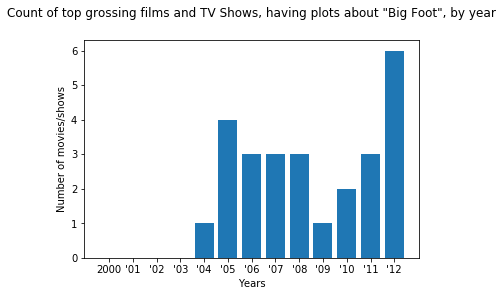

In [100]:
plt.bar(recent_years,recent_counts,align="center")
plt.title("Count of top grossing films and TV Shows, having plots about \"Big Foot\", by year",y = 1.08)
plt.xlabel("Years")
plt.ylabel("Number of movies/shows")
plt.show()

Text(14,0.95,'Note:\n2002, 2010 and 2011 were not in the top 10 years for\nBig Foot sightings, and so no data was included here.')

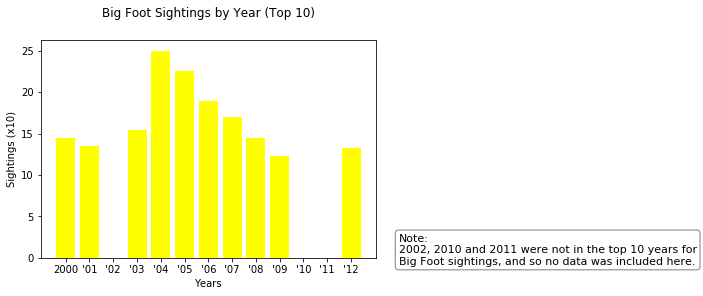

In [93]:
ufo_sightings = [14.5,13.5,0,15.4,25.0,22.6,18.9,17.0,14.5,12.3,0,0,13.2]
plt.title("Big Foot Sightings by Year (Top 10)",y = 1.08)
plt.xlabel("Years")
plt.ylabel("Sightings (x10)")
plt.bar(recent_years,ufo_sightings,color="yellow",align="center")
textstr = ("Note:\n2002, 2010 and 2011 were not in the top 10 years for\nBig Foot sightings, and so no data was included here.")
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(14, 0.95, textstr, fontsize=11,verticalalignment='center', bbox=props)